Import necassary packages

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE


Functions

In [10]:
def only_CORE(df:pd.DataFrame):
    return df.loc[df['DBName'] == 'CoRE12K']

def get_subset(df, limits1:list, limits2:list, ax = None, col1 = 'tsne_1', col2 = 'tsne_2', average_column = 'temperature', plot = True, facecolor_patch= 'red', info_plot = True, alpha = 0.4):
    df_subset = 0

    rect = patches.Rectangle((min(limits1), min(limits2)),
                              (max(limits1)-min(limits1)),
                              (max(limits2)-min(limits2)), 
                              linewidth=1, edgecolor=facecolor_patch, facecolor=facecolor_patch, alpha = alpha)
    
    df_subset = df[(df[col1] >= min(limits1)) & (df[col1] <= max(limits1)) & (df[col2] >= min(limits2)) & (df[col2] <= max(limits2))]
    df_subset_T = df_subset.dropna(subset = average_column)
    mean_T = round(df_subset_T[average_column].mean(), 2)

    infostring = f'n structures : {len(df_subset)}\nAverage Temperature: {mean_T} °C (n = {len(df_subset_T)})'
    infostring = f'Average Temperature: \n{mean_T} °C (n = {len(df_subset_T)})'
    if plot:
        if info_plot:
            ax.text(min(limits1), min(limits2)-0.5,
                    infostring, fontweight='bold' )
        ax.add_patch(rect)
    return df_subset, df_subset_T, mean_T

### Read Datafiles

In [11]:
df_SMS = pd.read_csv('full_dataset.csv')

/tmp/ipykernel_2024104/2928959368.py:1: DtypeWarning: Columns (1003,1006,1008,1010,1012,1013,1014,1015,1016,1019,1020,1021,1023) have mixed types. Specify dtype option on import or set low_memory=False.
  df_SMS = pd.read_csv('full_dataset.csv')


In [12]:
df_all =pd.read_csv('../diversity_metrics/all_feat_kmeans_all_with_cchem_depth3.csv')
df_CORE = only_CORE(df_all)

### Plot SMS dataset with CoRe 

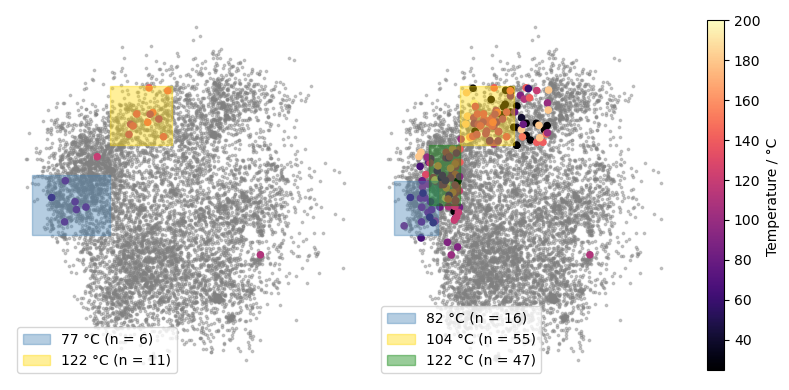

In [13]:
fig, axs = plt.subplots(1,2, tight_layout = True, figsize = (8,4))
axs = axs.flatten()

## Space in both plots
df_space = df_SMS.loc[df_SMS["dataset"]=='Space']

for ax in axs:
    ax.scatter(df_space['pca1'],
               df_space['pca2'], 
               s = 3, 
               color = 'gray', 
               alpha = 0.4)

    # remove axis
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    
df_balasz = df_SMS.loc[df_SMS["dataset"]=='Balasz']
df_joren = df_SMS.loc[df_SMS["dataset"]=='Joren']
df_extra = df_SMS.loc[df_SMS["dataset"]=='Balazs_extra']

sc0 = axs[0].scatter(df_balasz['pca1'],
              df_balasz['pca2'],
              c = df_balasz['T [°C]'],
              cmap = 'magma',
              s = 20,
              )
sc0.set_clim(25, 200)

subsets_ax0 = [{'X_limits': [-2.5,-1], 'Y_limits':[0.5,-0.5], 'colour': 'steelblue'},
           {'X_limits': [-1,0.2], 'Y_limits': [1,2], 'colour': 'gold'},
           ]
legend_values_ax0= []
for subset in subsets_ax0:
    df_subset, df_subset_T, subset_averageT = get_subset(df_balasz, subset['X_limits'],
                                                        subset['Y_limits'],
                                                        ax = axs[0], 
                                                        col1 = 'pca1', col2 = 'pca2', 
                                                        average_column= 'T [°C]',
                                                        facecolor_patch= subset['colour'],
                                                        info_plot=False)
    subset_patch = patches.Patch(color=subset['colour'], alpha =0.4, label=f'{round(subset_averageT)} °C (n = {len(df_subset_T)})')
    legend_values_ax0.append(subset_patch)
    axs[0].legend(handles=legend_values_ax0,  fontsize= 'medium', loc = 'lower left')


## PLOT 2
df_combined = pd.concat([df_extra, df_balasz])
sc1 = axs[1].scatter(df_combined['pca1'],
              df_combined['pca2'],
              c = df_combined['T [°C]'],
              cmap = 'magma',
              s = 20,
              )
sc1.set_clim(25, 200)

subsets_ax1 = [
           {'X_limits': [-2.5,-1.5], 'Y_limits':[0.4,-0.5], 'colour': 'steelblue'},
           {'X_limits': [-1,0.2], 'Y_limits': [1,2], 'colour': 'gold'},
           {'X_limits': [-1.7,-1], 'Y_limits':[0,1], 'colour': 'green'},
           ]
legend_values_ax0= []
for subset in subsets_ax1:
    df_subset, df_subset_T, subset_averageT = get_subset(df_combined, subset['X_limits'],
                                                        subset['Y_limits'],
                                                        ax = axs[1], 
                                                        col1 = 'pca1', col2 = 'pca2', 
                                                        average_column= 'T [°C]',
                                                        facecolor_patch= subset['colour'],
                                                        info_plot=False,
                                                        alpha=0.4)
    
    subset_patch = patches.Patch(color=subset['colour'], alpha =0.4, label=f'{round(subset_averageT)} °C (n = {len(df_subset_T)})')
    legend_values_ax0.append(subset_patch)

    axs[1].legend(handles=legend_values_ax0,  fontsize= 'medium', loc = 'lower left')

cbar = fig.colorbar(sc1, ax=axs[1], orientation='vertical', fraction=0.05, pad=0.09)
cbar.set_label('Temperature / °C ')

plt.savefig('temperature_plot.pdf')
